# Traitement d'image
# TP2 : Segmentation
@author : bahi ouadie

## Segmentation approche pixels

### Seuillage

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import skimage as ski

In [3]:
cameraman_tif = cv.imread('assets/cameraman.tif', 0)

In [4]:
ret,cameraman_thresh_binary = cv.threshold(cameraman_tif,127,255,cv.THRESH_BINARY)
ret,cameraman_thresh_tozero = cv.threshold(cameraman_tif,127,255,cv.THRESH_TOZERO)
cameraman_adaptive_thresh_mean_c = cv.adaptiveThreshold(cameraman_tif,
                                                        255,
                                                        cv.ADAPTIVE_THRESH_MEAN_C,
                                                        cv.THRESH_BINARY,
                                                        11,
                                                        2)
cameraman_adaptive_thresh_gaussian_c = cv.adaptiveThreshold(cameraman_tif,
                                                            255,
                                                            cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                            cv.THRESH_BINARY,
                                                            11,
                                                            2)
ret,cameraman_thresh_otsu = cv.threshold(cameraman_tif,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

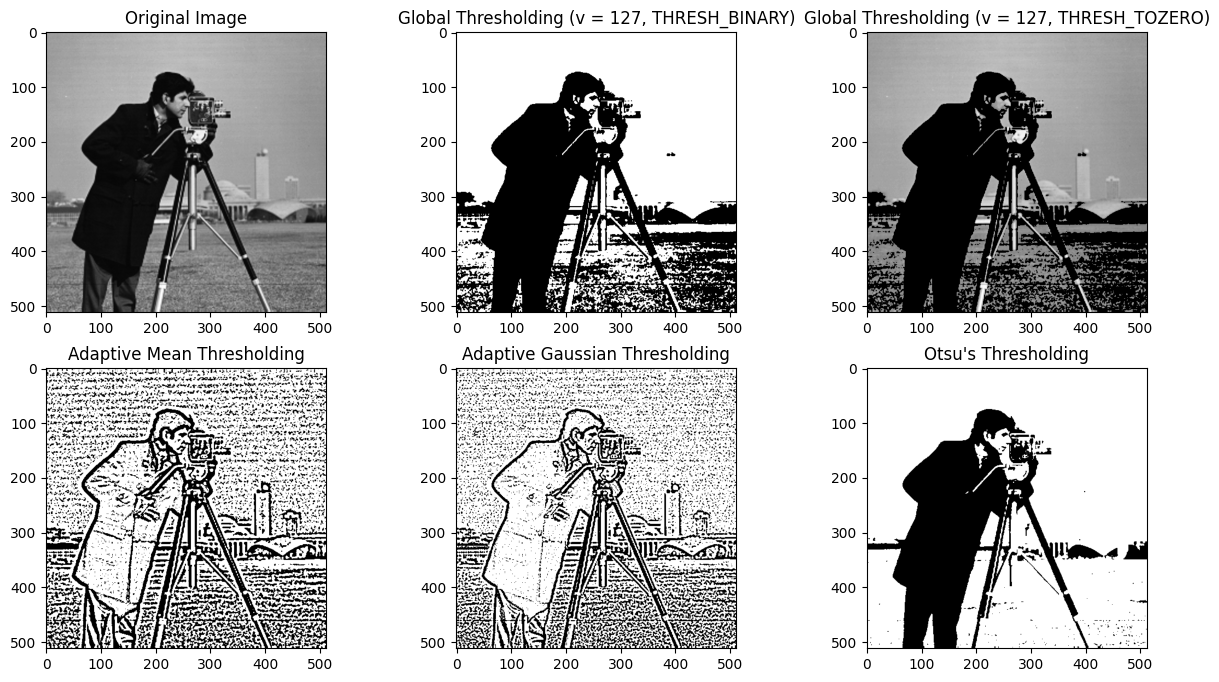

In [5]:
    titles = ['Original Image',
              'Global Thresholding (v = 127, THRESH_BINARY)',
              'Global Thresholding (v = 127, THRESH_TOZERO)',
              'Adaptive Mean Thresholding',
              'Adaptive Gaussian Thresholding',
              "Otsu's Thresholding"]

images = [cameraman_tif,
          cameraman_thresh_binary,
          cameraman_thresh_tozero,
          cameraman_adaptive_thresh_mean_c,
          cameraman_adaptive_thresh_gaussian_c,
          cameraman_thresh_otsu]

plt.figure(figsize=(15, 8))
for i in range(6) :
        plt.subplot(2,3,i+1)
        plt.imshow(images[i], 'gray')
        plt.title(titles[i])

plt.show()


In [6]:
from skimage import data

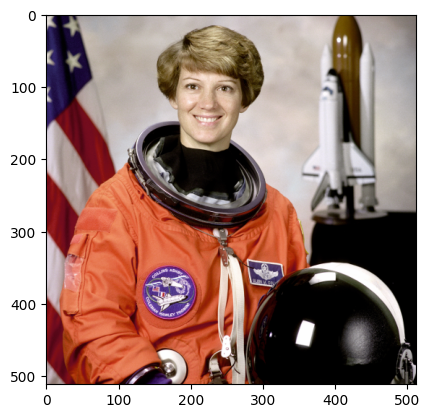

In [7]:
astronaut = data.astronaut()
plt.imshow(astronaut)
plt.show()

In [8]:
astronaut_green = astronaut[:,:,0]
astronaut_blue = astronaut[:,:,1]
astronaut_red = astronaut[:,:,2]

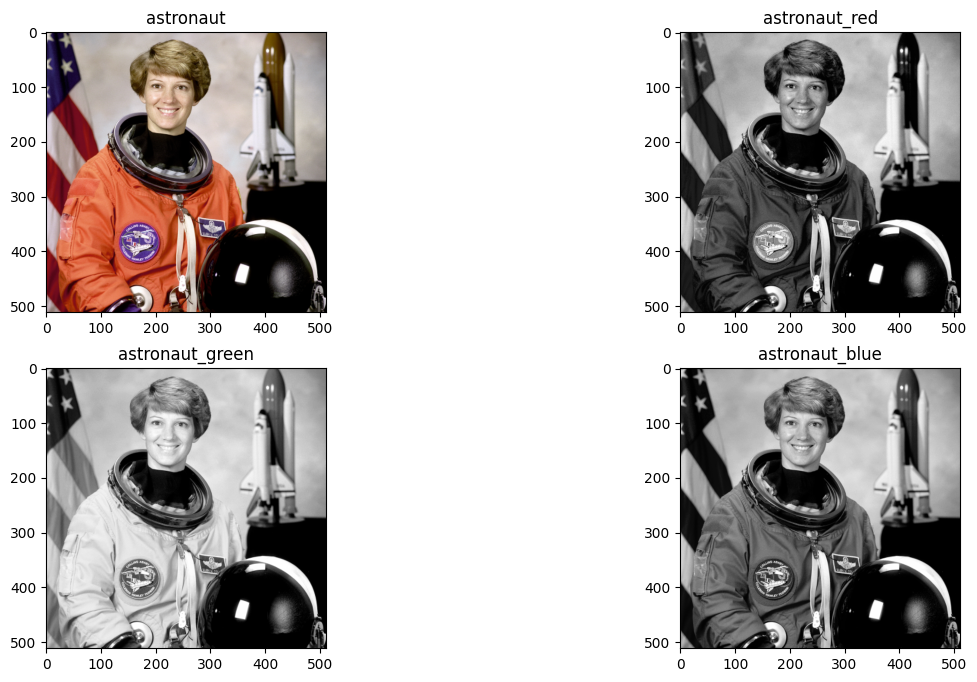

In [9]:
images = [astronaut, astronaut_red, astronaut_green, astronaut_blue]
titles = ['astronaut', 'astronaut_red', 'astronaut_green', 'astronaut_blue']
plt.figure(figsize=(15, 8))
for i in range(4) :
        plt.subplot(2,2,i+1)
        if i != 0:
            plt.imshow(images[i], "gray")
        else :
            plt.imshow(images[i])
            
        plt.title(titles[i])

plt.show()


In [10]:
ret, astronaut_thresh_100 = cv.threshold(astronaut_red,100,255,cv.THRESH_BINARY)
ret, astronaut_thresh_150 = cv.threshold(astronaut_red,150,255,cv.THRESH_BINARY)
ret, astronaut_thresh_200 = cv.threshold(astronaut_red,200,255,cv.THRESH_BINARY)

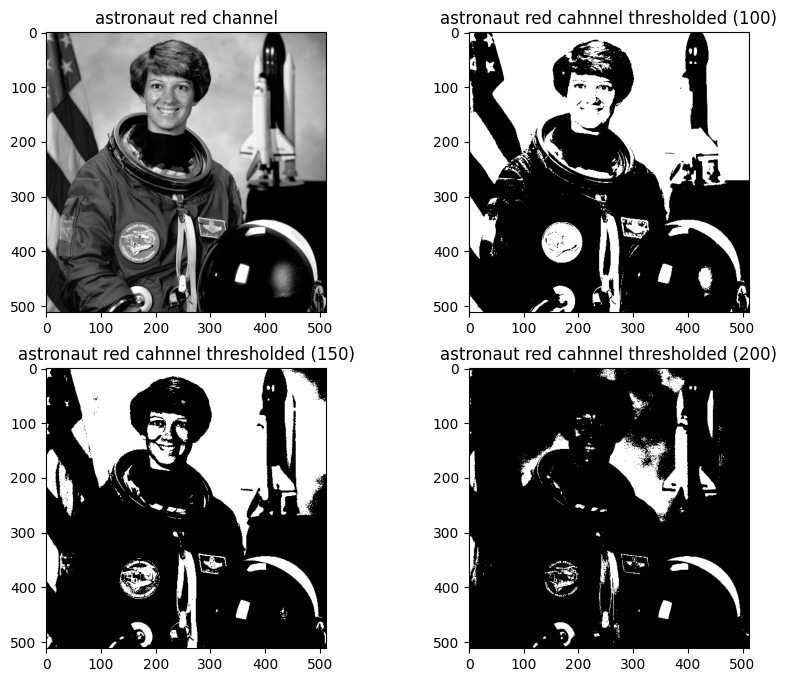

In [11]:
images = [astronaut_red, astronaut_thresh_100, astronaut_thresh_150, astronaut_thresh_200 ]
titles = ['astronaut red channel',
          'astronaut red cahnnel thresholded (100)',
          'astronaut red cahnnel thresholded (150)',
          'astronaut red cahnnel thresholded (200)']
plt.figure(figsize=(10, 8))
for i in range(4) :
        plt.subplot(2,2,i+1)
        plt.imshow(images[i], "gray")
        plt.title(titles[i])
plt.show()

In [12]:
ret, astronaut_thresh_100 = cv.threshold(astronaut_blue,100,255,cv.THRESH_BINARY)
ret, astronaut_thresh_150 = cv.threshold(astronaut_blue,150,255,cv.THRESH_BINARY)
ret, astronaut_thresh_200 = cv.threshold(astronaut_blue,200,255,cv.THRESH_BINARY)

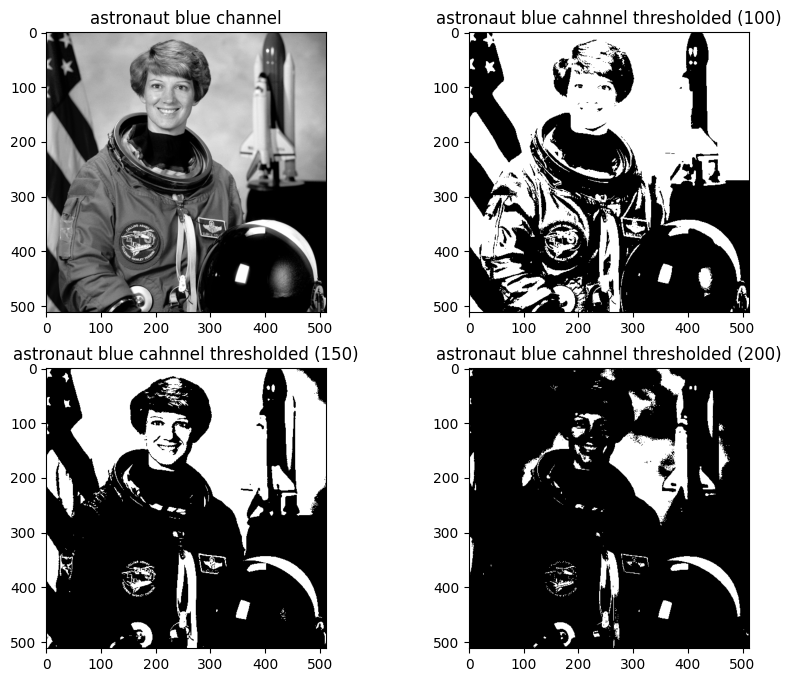

In [13]:
images = [astronaut_blue, astronaut_thresh_100, astronaut_thresh_150, astronaut_thresh_200 ]
titles = ['astronaut blue channel',
          'astronaut blue cahnnel thresholded (100)',
          'astronaut blue cahnnel thresholded (150)',
          'astronaut blue cahnnel thresholded (200)']
plt.figure(figsize=(10, 8))
for i in range(4) :
        plt.subplot(2,2,i+1)
        plt.imshow(images[i], "gray")
        plt.title(titles[i])

plt.show()

In [14]:
ret, astronaut_thresh_100 = cv.threshold(astronaut_green,100,255,cv.THRESH_BINARY)
ret, astronaut_thresh_150 = cv.threshold(astronaut_green,150,255,cv.THRESH_BINARY)
ret, astronaut_thresh_200 = cv.threshold(astronaut_green,200,255,cv.THRESH_BINARY)

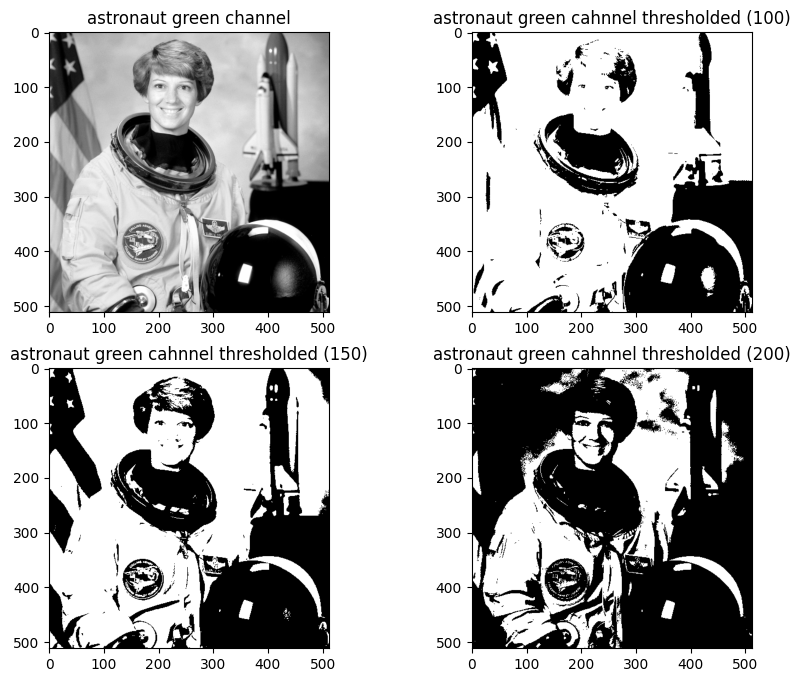

In [15]:
images = [astronaut_green, astronaut_thresh_100, astronaut_thresh_150, astronaut_thresh_200 ]
titles = ['astronaut green channel',
          'astronaut green cahnnel thresholded (100)',
          'astronaut green cahnnel thresholded (150)',
          'astronaut green cahnnel thresholded (200)']
plt.figure(figsize=(10, 8))
for i in range(4) :
        plt.subplot(2,2,i+1)
        plt.imshow(images[i], "gray")
        plt.title(titles[i])

plt.show()

### K-moyennes

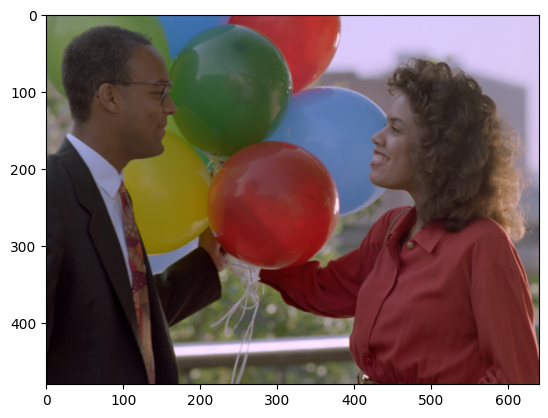

In [16]:
balloons_tif = cv.imread('assets/balloons.tif')
balloons_tif = cv.cvtColor(balloons_tif, cv.COLOR_BGR2RGB)
plt.imshow(balloons_tif)

In [17]:
pixel_vals = balloons_tif.reshape((-1,3))
pixel_vals = np.float32(pixel_vals)

In [18]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.85)

In [19]:
k = 20

In [20]:
retval, labels, centers = cv.kmeans(pixel_vals, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

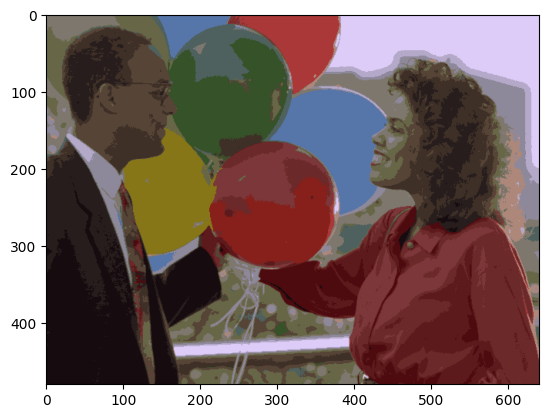

In [21]:
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape((balloons_tif.shape))
plt.imshow(segmented_image)

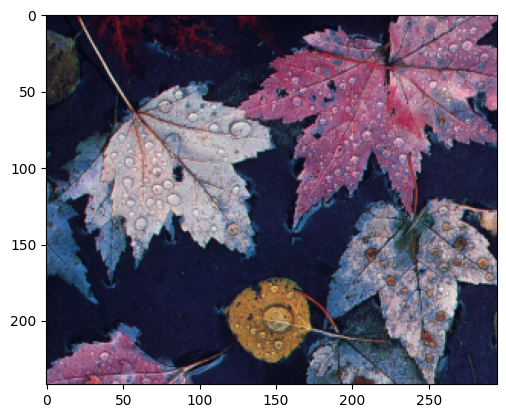

In [22]:
leaves_tif = cv.imread('assets/leaves.tif')
leaves_tif = cv.cvtColor(leaves_tif, cv.COLOR_BGR2RGB)
plt.imshow(leaves_tif)

In [23]:
pixel_vals = leaves_tif.reshape((-1,3))
pixel_vals = np.float32(pixel_vals)

In [24]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.85)

In [25]:
k = 2

In [26]:
retval, labels, centers = cv.kmeans(pixel_vals, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

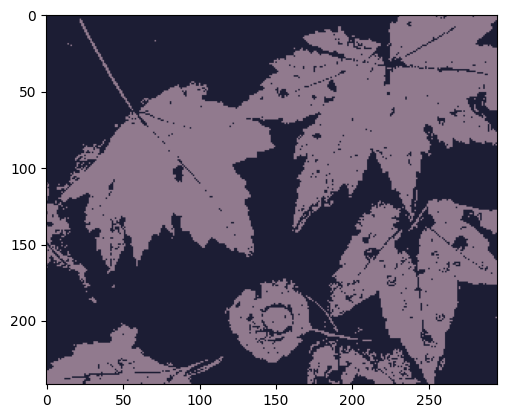

In [27]:
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape((leaves_tif.shape))
plt.imshow(segmented_image)

## Segmentation approche pixels

In [28]:
def mse(image1, image2) :
    if image1.shape != image2.shape :
        raise Exception
    mse = np.mean((image1 - image2)**2)
    return mse

In [29]:
cameraman_blur = cv.GaussianBlur(cameraman_tif, (5,5), 0)

In [30]:
cameraman_sabel = cv.Sobel(cameraman_blur,cv.CV_64F,1,0,ksize=5)
cameraman_laplacian = cv.Laplacian(cameraman_blur,cv.CV_64F)
cameraman_canny = cv.Canny(cameraman_blur,100,200)

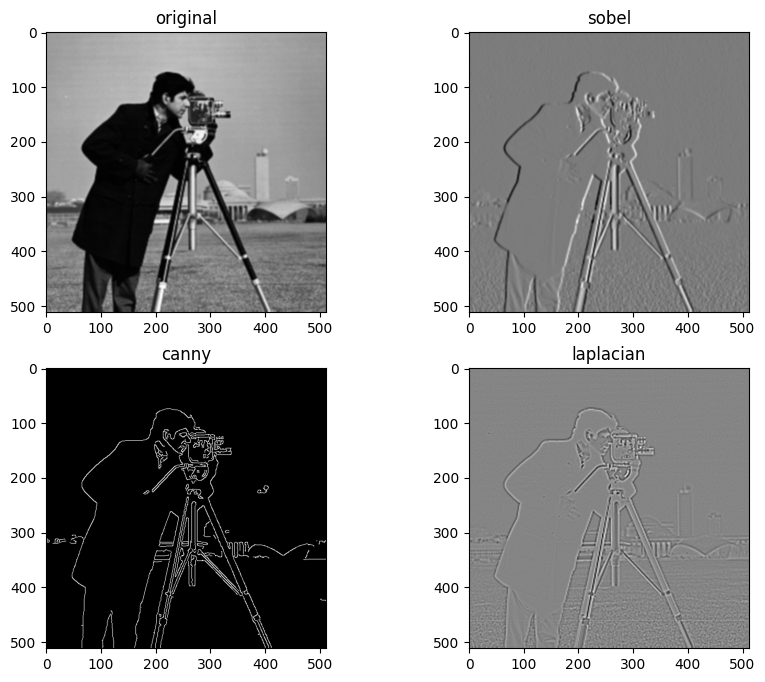

In [31]:
images = [cameraman_blur, cameraman_sabel, cameraman_canny, cameraman_laplacian]
titles = ['original', 'sobel', 'canny', 'laplacian']
plt.figure(figsize=(10, 8))
for i in range(4) :
        plt.subplot(2,2,i+1)
        plt.imshow(images[i], "gray")
        plt.title(titles[i])

plt.show()


In [39]:
image = cv.imread("assets/input.png", 0)
image_output = cv.imread("assets/output.png", 0)

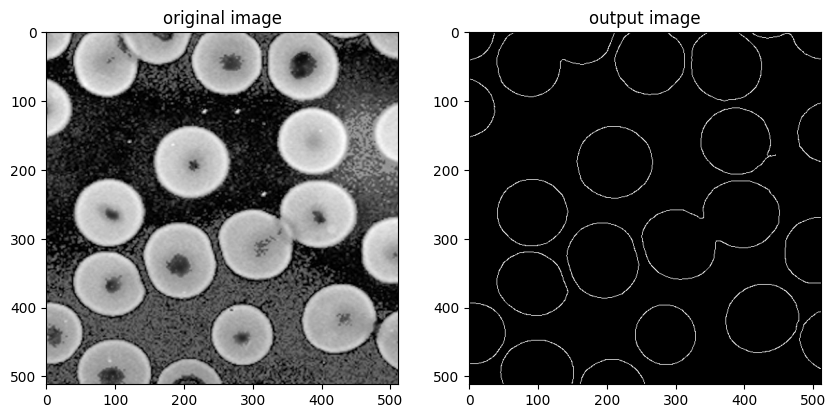

In [43]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
plt.imshow(image, "gray")
plt.title("original image")

plt.subplot(1,2,2)
plt.imshow(image_output, "gray")
plt.title("output image")

plt.show()

In [44]:
image_blur = cv.GaussianBlur(image, (5,5), 0)

In [45]:
image_sabel = cv.Sobel(image_blur,cv.CV_64F,1,0,ksize=5)
image_laplacian = cv.Laplacian(image_blur,cv.CV_64F)
image_canny = cv.Canny(image_blur,100,200)

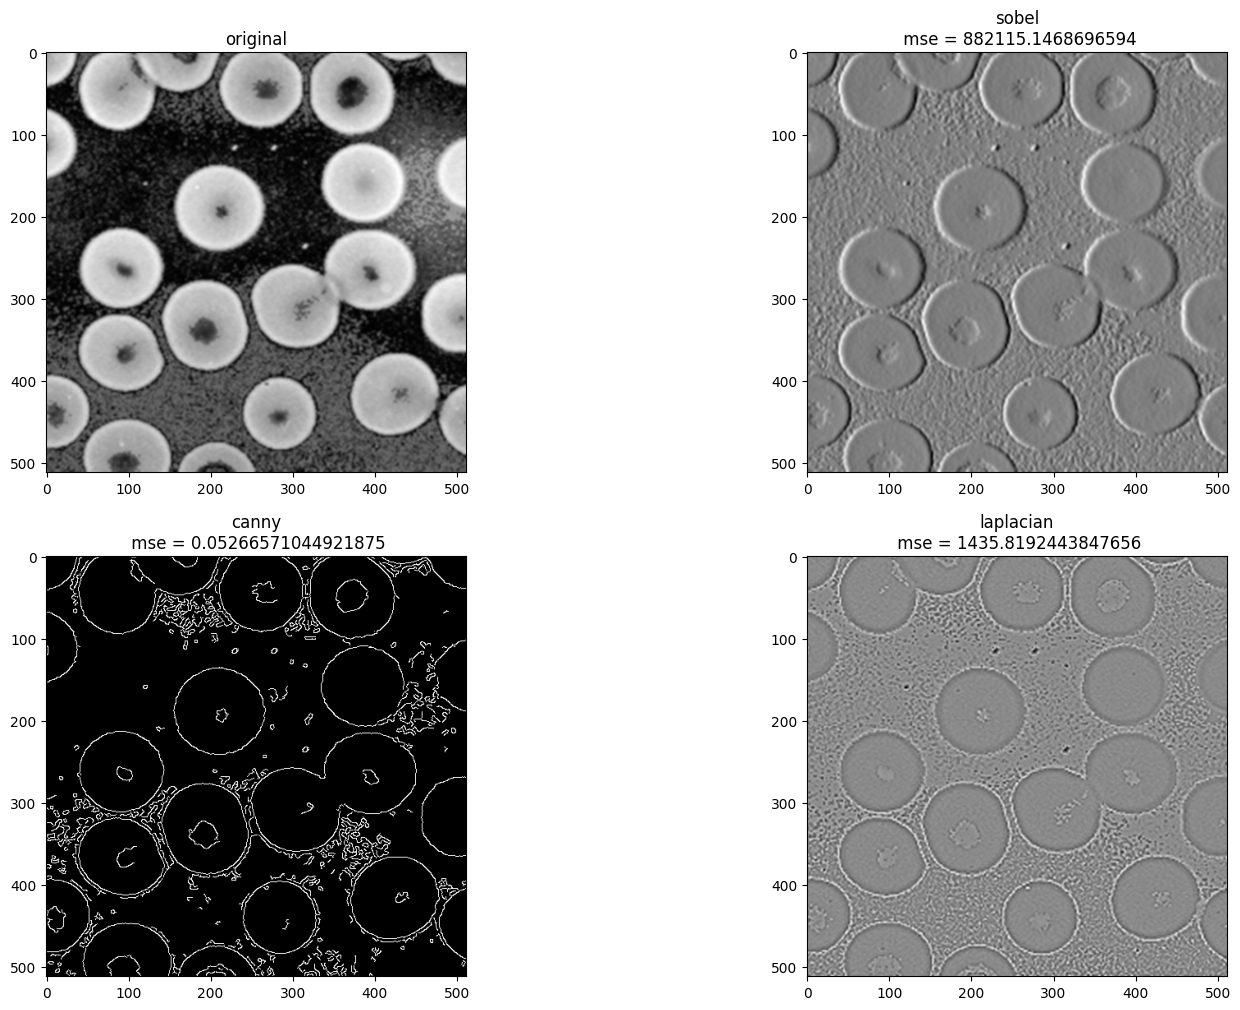

In [53]:
images = [image_blur, image_sabel, image_canny, image_laplacian]
titles = ['original', 'sobel', 'canny', 'laplacian']
mses = [
    0,
    mse(image_sabel, image_output),
    mse(image_canny, image_output),
    mse(image_laplacian, image_output),
]
plt.figure(figsize=(18, 12))
for i in range(4) :
        plt.subplot(2,2,i+1)
        plt.imshow(images[i], "gray")
        if i != 0 :
            plt.title(titles[i] + "\n mse = " + str(mses[i]))
        else :
            plt.title(titles[i])

plt.show()